In [29]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

with open(r'D:\TFG\tfg_git\data\news\news3.pkl', 'rb') as f:
    data = pickle.load(f)

In [30]:
# extract domain from urls

from urllib.parse import urlparse

domain = urlparse(data["url"][1]).netloc
print(domain) # --> www.example.test

www.breitbart.com


In [31]:
domains = []
for i in data["url"]: 
    domains.append(urlparse(i).netloc)

In [32]:
domains_f = []
for i in domains:
    domains_f.append(i.replace("www.","").replace(".com",""))

In [33]:
top10media = pd.Series(domains_f).value_counts()[0:10]

In [34]:
len( pd.Series(domains).value_counts())

1408

In [35]:
print(top10media)

usnews            1086
news.yahoo         800
rawstory           744
medium             355
breitbart          338
msn                315
washingtonpost     312
freerepublic       299
arcamax            290
politico           288
dtype: int64


In [36]:
top10media.tolist()

[1086, 800, 744, 355, 338, 315, 312, 299, 290, 288]

C:\Users\User\AppData\Local\Temp\ipykernel_25236\2177325653.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(top10media.index.tolist(), fontsize=20)


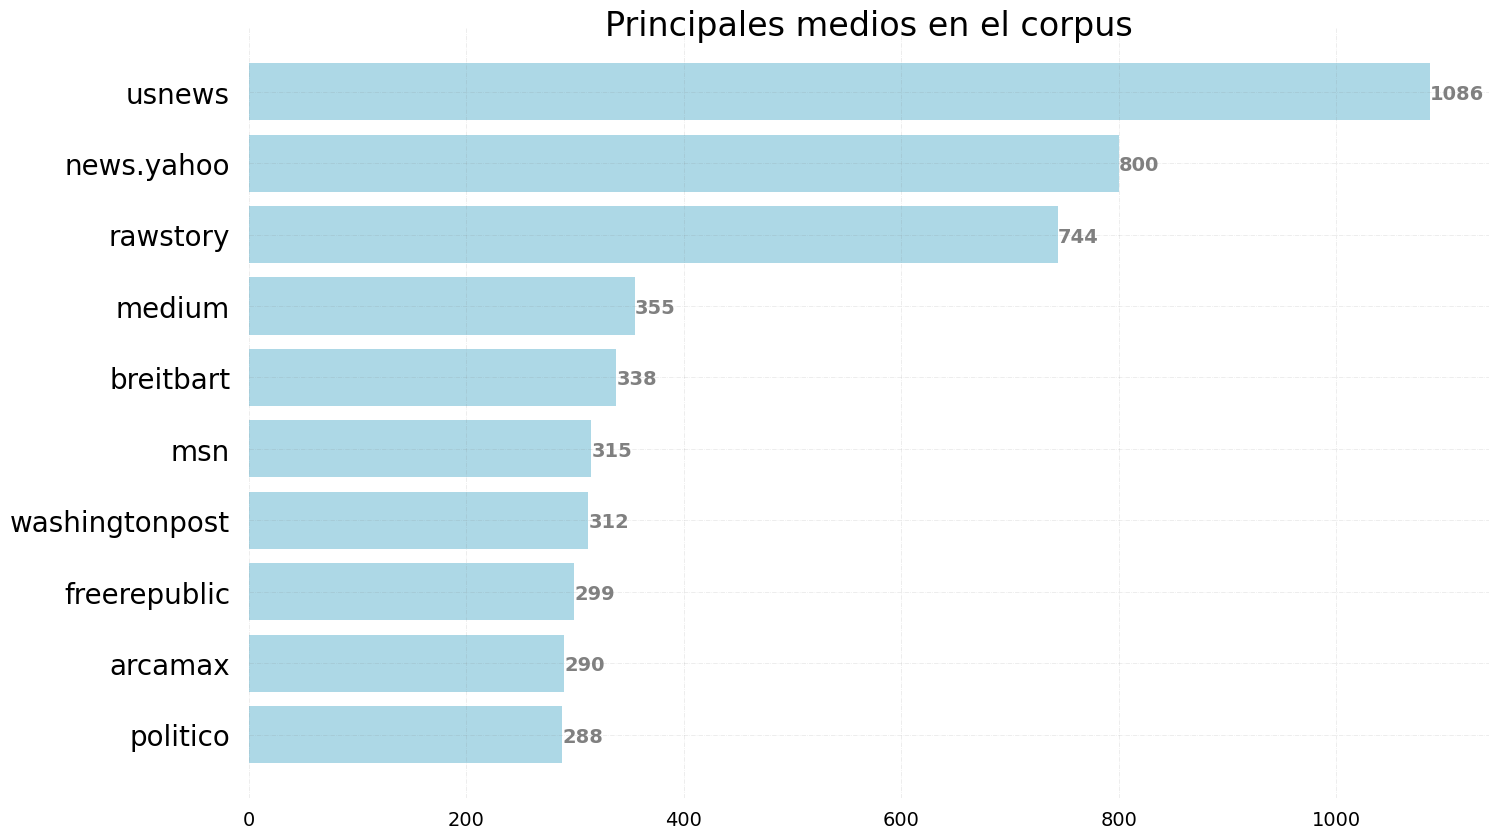

In [37]:
au = top10media.index.tolist()
n = top10media.tolist()
# Figure Size
fig, ax = plt.subplots(figsize =(16, 10))
 
# Horizontal Bar Plot
ax.barh(au, n, color='lightblue')
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(visible = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 14, fontweight ='bold',
             color ='grey')
ax.set_title("Principales medios en el corpus", y=0.98, fontsize=24)
ax.set_yticklabels(top10media.index.tolist(), fontsize=20)
ax.tick_params(axis='x', labelsize=14)

# Add Text watermark
#fig.text(0.9, 0.15, 'Jeeteshgavande30', fontsize = 12,
#         color ='grey', ha ='right', va ='bottom',
#         alpha = 0.7)
 
# Show Plot
plt.show()

In [38]:
fig.savefig('media_countplot.jpg', dpi=600)


In [16]:
sum(top10media.tolist())/26501*100

18.2144070035093

In [17]:
data

,url,published,crawled,author,topic,uuid,title,text,site,domainRank,timeDiff,authorInText,twAccountMentions,clean_text,personCounter
0,https://www.washingtontimes.com/news/2020/feb/...,2020-02-20 22:17:00,2020-02-21 00:30:41,THE WASHINGTON TIMES,BERNIESANDERS_SINYMISQ,e9a7d4b85ff749c57825105385ceb287de629c56,LETTERS TO THE EDITOR: A barren Democratic field,"By THE WASHINGTON TIMES - - Thursday, February...",washingtontimes.com,3106,0 days 02:13:41,True,[],"By THE WASHINGTON TIMES - - Thursday, February...","{'Michael Bloomberg': 1, 'Bernie Sanders': 1, ..."
1,https://www.breitbart.com/politics/2020/02/20/...,2020-02-20 00:00:00,2020-02-21 00:40:42,breitbart.com,JOEBIDEN_EPUSICPG,f7c71fd44b520b096bd9b6547212c3b69731674d,"Poll: Trump Leads in Wisconsin, Trails Democra...","Poll: Trump Leads in Wisconsin, Trails Democr...",breitbart.com,967,1 days 00:40:42,False,[@RealKyleMorris],"Poll: Trump Leads in Wisconsin, Trails Democra...","{'Donald Trump': 1, 'Trump': 6, 'Joe Biden': 1..."
2,https://www.freep.com/story/news/politics/elec...,2020-02-20 22:19:00,2020-02-21 00:57:47,freep.com,DONALDTRUMP_IUEPFJCG,f33143e113f9f8e827c916fe9e5612a05d17941a,Trump campaign: President to rally supporters ...,President Donald Trump is in Colorado Thursday...,freep.com,2980,0 days 02:38:47,False,[],President Donald Trump is in Colorado Thursday...,"{'Donald Trump': 9, 'Fox': 2, 'Trump': 25, 'Se..."
3,https://www.freep.com/story/news/politics/elec...,2020-02-20 21:01:00,2020-02-21 01:38:47,freep.com,JOEBIDEN_EPUSICPG,196679a0573562dee2c6860148832c906710be28,"Trump beats all top Dems in Wis., loses in Pa....","WASHINGTON – Michigan, Pennsylvania and Wiscon...",freep.com,2980,0 days 04:37:47,False,[],"WASHINGTON Michigan, Pennsylvania and Wiscons...","{'Donald Trump': 1, 'Hillary Clinton': 1, 'Cli..."
4,https://www.freep.com/story/news/politics/elec...,2020-02-20 22:19:00,2020-02-21 01:39:38,freep.com,BERNIESANDERS_SINYMISQ,97f9941f49573d019143eda4757f14f0088f9874,Trump campaign: President to rally supporters ...,President Donald Trump is in Colorado Thursday...,freep.com,2980,0 days 03:20:38,False,[],President Donald Trump is in Colorado Thursday...,"{'Donald Trump': 11, 'Cory Gardner': 2, 'Gardn..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33394,https://www.usnews.com/news/best-states/missou...,2020-02-10 18:13:00,2020-02-10 18:41:42,Associated Press,DONALDTRUMP_TBJQDCXU,5be3b6910adf42683157b74cac27b688d0ad1ab2,Missouri Ag Agency Has Backlog of Dicamba Drif...,Missouri News Missouri Ag Agency Has Backlog o...,usnews.com,1027,0 days 00:28:42,True,[],Missouri News Missouri Ag Agency Has Backlog o...,"{'Sami Jo Freeman': 1, 'Casey Leins': 2, 'Harv..."
33395,https://www.usnews.com/news/best-states/pennsy...,2020-02-10 16:54:00,2020-02-10 18:44:13,Associated Press,DONALDTRUMP_TBJQDCXU,7b6b6fe1d37979327372c368cbb26d29f29e1962,"Burglary, Theft-Related Charges Dropped Agains...","Pennsylvania News Burglary, Theft-Related Char...",usnews.com,1027,0 days 01:50:13,True,[],"Pennsylvania News Burglary, Theft-Related Char...","{'Donald Trump': 2, 'More': 1, 'Shawn Christy'..."
33396,https://www.wusa9.com/article/news/politics/el...,2020-03-01 02:47:00,2020-03-01 02:54:51,,JOEBIDEN_ZPJGQYKN,cd86110da94a1c25bb5fc13e5f201da474743d95,Biden gets hopeful Virginia bump with endorsem...,Video: Associated Press Biden gets hopeful Vir...,wusa9.com,39353,0 days 00:07:51,False,[],Video: Associated Press Biden gets hopeful Vir...,"{'Biden': 4, 'Terry McAuliffe': 2, 'Nick Boyki..."
33397,https://www.cnsnews.com/article/national/cnsne...,2020-02-28 00:00:00,2020-03-01 03:13:07,,JOEBIDEN_ZPJGQYKN,c04a46f73be61351d799c846130526434f9e71aa,"Biden Says He Will Send 35,000 to 60,000 More ...","Biden Says He Will Send 35,000 to 60,000 More ...",cnsnews.com,12476,2 days 03:13:07,False,[],"Biden Says He Will Send 35,000 to 60,000 More ...","{'Biden': 5, 'Joe Biden': 1, 'Joe Biden's': 1}"


In [21]:

lens = []
for i in data.text: 
    lens.append(len(i.split()))
    

In [22]:
sum(lens)/len(lens)

1073.6159067767846